# **Singular Value Decomposition**

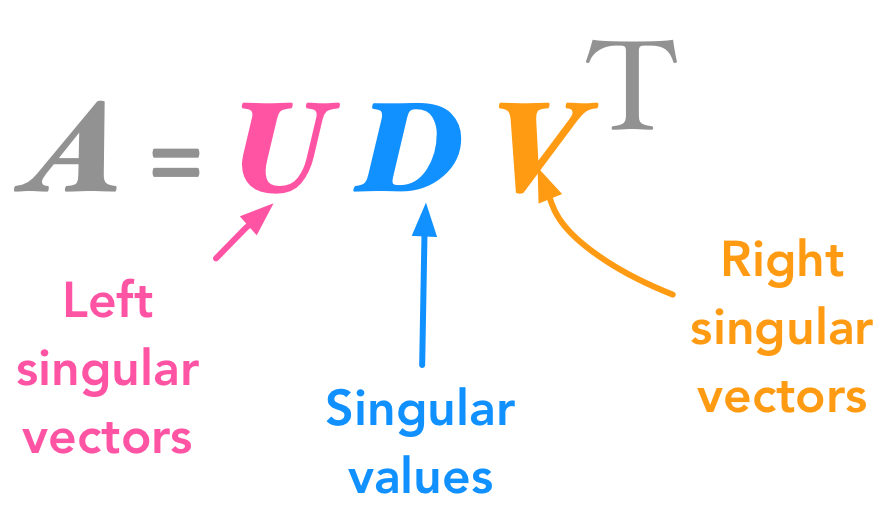

## ***IMPORTING THE LIBRARIES***

In [ ]:
import numpy as np
import pandas as pd

## ***LOADING, PARSING AND SUMMARIZING THE DATASET***

In [ ]:
movies = pd.io.parsers.read_csv("movies.dat",names=["Movie_ID","Movie_Title","Genres"],engine="python",delimiter="::",encoding='latin-1')

In [ ]:
movies

,Movie_ID,Movie_Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
rating = pd.io.parsers.read_csv("ratings.dat",names=["User_ID","Movie_ID","Rating","Time"],engine="python",delimiter="::")

In [ ]:
rating

,User_ID,Movie_ID,Rating,Time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


## ***CREATING THE MATRIX***

In [ ]:
rating_matrix = np.ndarray(shape=(np.max(rating.Movie_ID.values),np.max(rating.User_ID.values)),dtype=np.uint8)
rating_matrix[rating.Movie_ID.values-1,rating.User_ID.values-1] = rating.Rating.values

In [ ]:
rating_matrix

array([[  5, 175,  79, ...,   0,   0,   3],
       [162, 136,  78, ...,   0,   0,   0],
       [194,  23,  78, ...,   0,   0,   0],
       ...,
       [208, 178, 120, ..., 126,   0,   0],
       [ 96,  68, 116, ..., 126,   0,   0],
       [240, 213, 111, ..., 126,   0,   0]], dtype=uint8)

## ***NORMALIZATION OF VALUES***

In [ ]:
Normalized_Result = rating_matrix - np.asarray([(np.mean(rating_matrix,1))]).T

In [ ]:
Normalized_Result

array([[ -32.46672185,  137.53327815,   41.53327815, ...,  -37.46672185,
         -37.46672185,  -34.46672185],
       [ 117.28294702,   91.28294702,   33.28294702, ...,  -44.71705298,
         -44.71705298,  -44.71705298],
       [ 151.86390728,  -19.13609272,   35.86390728, ...,  -42.13609272,
         -42.13609272,  -42.13609272],
       ...,
       [ 104.09652318,   74.09652318,   16.09652318, ...,   22.09652318,
        -103.90347682, -103.90347682],
       [  -8.0410596 ,  -36.0410596 ,   11.9589404 , ...,   21.9589404 ,
        -104.0410596 , -104.0410596 ],
       [ 144.69751656,  117.69751656,   15.69751656, ...,   30.69751656,
         -95.30248344,  -95.30248344]])

## ***COMPUTING SINGULAR VALUE DECOMPOSITION***

In [ ]:
A = Normalized_Result.T / np.sqrt(rating_matrix.shape[0]-1)

In [ ]:
U, D, V = np.linalg.svd(A)

In [ ]:
U

array([[ 1.45604807e-02,  1.10951715e-02, -9.04660097e-03, ...,
         2.86002940e-04, -1.93522174e-04,  9.65507160e-04],
       [ 1.54127041e-02,  1.03574856e-02, -1.27664860e-02, ...,
         3.46948931e-04, -2.22479596e-04,  6.44009076e-04],
       [ 1.09429463e-02,  4.01545633e-03,  3.15178984e-02, ...,
        -5.30789177e-04,  4.60579741e-04,  1.23304104e-03],
       ...,
       [-6.19647546e-03, -1.19495666e-02, -1.88721603e-03, ...,
         8.75425757e-01, -6.05153789e-04, -7.17205743e-03],
       [-1.90040363e-02,  6.43906923e-03, -5.11127434e-05, ...,
        -1.33354168e-03,  9.57303356e-01,  3.04300840e-04],
       [-1.89597687e-02,  6.45335508e-03, -9.82126306e-05, ...,
        -7.88433698e-03, -8.67005506e-04,  9.07214461e-01]])

In [ ]:
D

array([3.61404753e+03, 2.99278921e+03, 1.51383258e+03, ...,
       1.65705024e-01, 1.62607475e-01, 1.55756139e-01])

In [ ]:
V

array([[ 0.01161364,  0.0136856 ,  0.01252109, ...,  0.01821974,
         0.01825343,  0.01622531],
       [ 0.00981324,  0.01168072,  0.01076052, ..., -0.02171333,
        -0.02163747, -0.02114824],
       [-0.00672006, -0.00414827, -0.00232529, ..., -0.00372474,
        -0.00515326, -0.00339753],
       ...,
       [-0.00155152,  0.00050632, -0.01357685, ..., -0.00071353,
        -0.00584215,  0.00015743],
       [-0.00130793, -0.00308253,  0.00595852, ..., -0.00092258,
         0.01235577, -0.00068152],
       [ 0.00509335, -0.00487445,  0.00468349, ..., -0.00213455,
        -0.01457548,  0.00040487]])

## ***BUILDING RECOMMENDATION SYSTEM***

In [93]:
def similar(sliced, movie_id, top_n):
  movie_id    = movie_id -  1
  movie_row   = sliced[movie_id,:]
  magnitude   = np.sqrt(np.einsum("ij,ij->i",sliced,sliced))
  similaritiy = np.dot(movie_row,sliced.T)/(magnitude[movie_id]*magnitude)
  sorting     = np.argsort(-similaritiy)
  return sorting[:top_n]

In [99]:
k        = 50 # number of principal components
movie_id = 2
top_n    = 5
sliced   = V.T[:,:k]

index    = similar(sliced, movie_id, top_n)

print("RECOMMENDATION FOR MOVIE","'",movies[movies.Movie_ID == movie_id].Movie_Title.values[0],"'",":")

for id in index:
  print(movies[movies.Movie_ID == id].Movie_Title.values[0])

RECOMMENDATION FOR MOVIE ' Jumanji (1995) ' :
Toy Story (1995)
Return of the Pink Panther, The (1974)
Johns (1996)
Star Trek IV: The Voyage Home (1986)
My Fellow Americans (1996)
